### Linear Regression

### (A) Using the data in previous assignment

##### Implementing Pre-Processing prior to applying linear regression modeling.

In [86]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_weather = pd.read_csv('sudeste.csv',sep=',')
df_weather.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [87]:
# Randomly sample 10% of your dataframe
df_w = df_weather.sample(frac=0.1)
df_w.shape

(977917, 31)

In [88]:
# Checking for any Missing Values In the Data Set is a pre-processing step to applying Linear regression on to our data set. 

##### Find all the NAN values withing the dataset

In [89]:
#Find all the NAN values withing the dataset PRCP, GBRD, TMAX, DMAX, TMIN, DMIN, TEMO, WDSP, GUST, HMIN all columns that include some NAN values 
df_w.isna().sum()

wsid         0
wsnm         0
elvt         0
lat          0
lon          0
inme         0
city         0
prov         0
mdct         0
date         0
yr           0
mo           0
da           0
hr           0
prcp    836643
stp          0
smax         0
smin         0
gbrd    411831
temp         5
dewp        51
tmax         1
dmax        28
tmin         4
dmin        84
hmdy         0
hmax         0
hmin         2
wdsp     92691
wdct         0
gust     31587
dtype: int64

##### Set the follwoing NAN values found in the columns below to the columns mean

In [90]:
# Set the follwoing NAN values found in the columns below to the columns mean
# And we need to replace NaN values with mean values of each column:
df_w['prcp'] = df_w['prcp'].fillna(df_w['prcp'].mean())
df_w['gbrd'] = df_w['gbrd'].fillna(df_w['gbrd'].mean())
df_w['tmin'] = df_w['tmin'].fillna(df_w['tmin'].mean())
df_w['tmax'] = df_w['tmax'].fillna(df_w['tmax'].mean())
df_w['temp'] = df_w['temp'].fillna(df_w['temp'].mean())
df_w['gust'] = df_w['gust'].fillna(df_w['gust'].mean())
df_w['wdsp'] = df_w['wdsp'].fillna(df_w['wdsp'].mean())

df_w.isna().sum()

wsid     0
wsnm     0
elvt     0
lat      0
lon      0
inme     0
city     0
prov     0
mdct     0
date     0
yr       0
mo       0
da       0
hr       0
prcp     0
stp      0
smax     0
smin     0
gbrd     0
temp     0
dewp    51
tmax     0
dmax    28
tmin     0
dmin    84
hmdy     0
hmax     0
hmin     2
wdsp     0
wdct     0
gust     0
dtype: int64

##### Dropping columns that are unecessary to our predictions

In [91]:
# Dropping attributes with very little correlation
df_w = df_w.drop(['elvt','lat','lon','inme','inme','mdct','dewp','dmax','dmin','wdct','prov','stp','smin','smax','city','da','hr','gbrd','hmin','hmax',],axis=1)
df_w.shape

(977917, 12)

Output the result if any NAN values

In [92]:
#check for any null values false means there are none to be found in the dataset
df_w.isnull().any()

wsid    False
wsnm    False
date    False
yr      False
mo      False
prcp    False
temp    False
tmax    False
tmin    False
hmdy    False
wdsp    False
gust    False
dtype: bool

Temperature - the measure of warmth or coldness

Humidity - the amount of moisture in the atmosphere

Precipitation - the amount of moisture (usually rain or snow) which falls on the ground

Wind Speed -  the speed at which air flows through the environment

Pressure - the force the atmosphere applies on the environment

### Clean Data Analysis before Linear Regression model applied.

#### Analyzig Data and choosing a weather station from wsid attribute to visualize a year worth of rain precipitation for that station

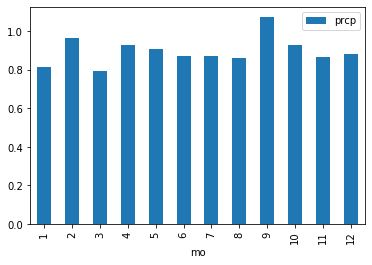

In [93]:
station = df_w['wsid'] == 371
station_name = df_w[station]
station_name_year = station_name.tail(224)

station_rain = station_name_year[['mo','prcp']].fillna(0)

total_rainfall = station_rain.groupby('mo').sum().reset_index()
average_rainfall = station_rain.groupby('mo').mean().reset_index()


average_rainfall.plot( x='mo', y='prcp', kind='bar')

#### Seaborn plot for better visualization of average rain precipitaiton

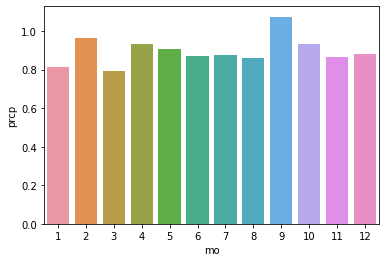

In [94]:
sns.barplot(x=average_rainfall.mo, y=average_rainfall.prcp)

Plot graph of entire data set 'tmin' and 'tmax' which entails the minimum temperature recorded and maximum temperatures recorded.

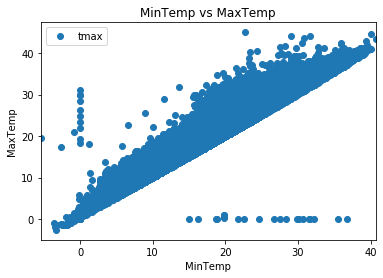

In [95]:

df_w.plot(x='tmin', y='tmax', style='o')  
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

#### Average Maximum Temperature is Between 20 and 30 degrees celsius based on the distrubution graph below.
Allows us to determine visually the highest recording of temperature across dataset.

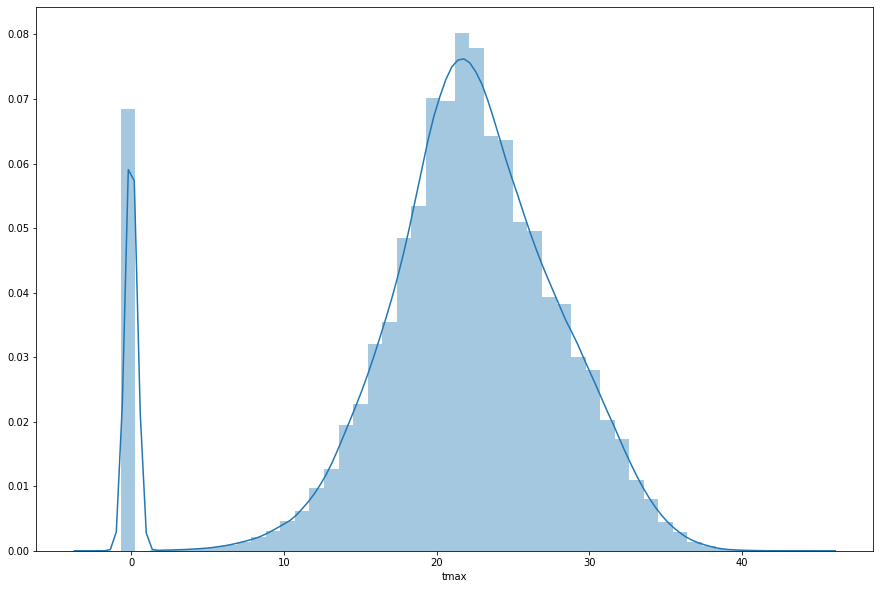

In [96]:
import seaborn as seabornInstance 

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_w['tmax'])


#### #Average Minimum Temperature is Between 20 and 30 degrees celsius based on the distrubution graph below.
Allows us to determine visually the highest recording of temperature across dataset.

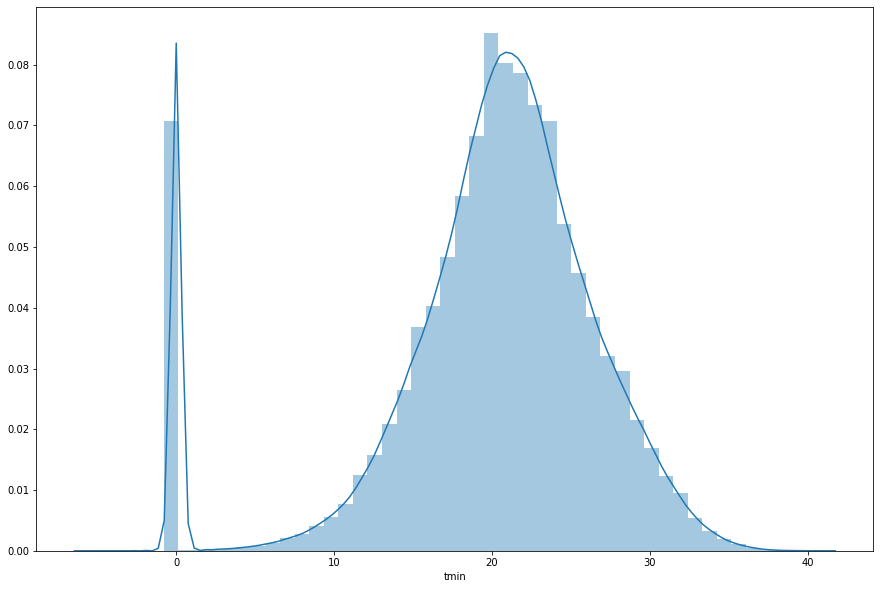

In [97]:
import seaborn as seabornInstance 
df_w['tmin'] = df_w['tmin'].fillna(df_w['tmin'].mean())
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_w['tmin'])

###### a summarized collection of total weather stations in our dataset. A total of 122 weather station Id's

In [98]:
#total station weather station id's
station = df_w['wsid'].unique()
station_name = station.size
print('Total Number of Weather Stations: ' + str(station_name))
station

Total Number of Weather Stations: 122


array([347, 384, 336, 358, 312, 421, 341, 419, 315, 399, 310, 351, 345,
       316, 401, 410, 313, 330, 378, 361, 379, 418, 334, 397, 327, 305,
       324, 303, 329, 321, 393, 402, 359, 318, 398, 376, 340, 309, 360,
       411, 406, 353, 392, 417, 364, 380, 355, 346, 394, 389, 388, 317,
       319, 335, 354, 382, 306, 385, 332, 395, 412, 400, 414, 311, 349,
       348, 322, 350, 339, 371, 381, 416, 413, 420, 403, 383, 370, 320,
       343, 405, 331, 328, 373, 326, 333, 363, 338, 325, 365, 308, 337,
       314, 356, 372, 377, 374, 367, 362, 357, 352, 408, 375, 344, 323,
       307, 407, 404, 396, 415, 422, 409, 178, 366, 342, 390, 304, 423,
       386, 368, 391, 369, 387], dtype=int64)

###### Determing a weather station with high records.

using the value_counts() method we are allowed to see the number of records each weather station id holds. 
The stations with the lowest records do not hold consistent monthly temperature or precipitation. Which entails that sepcific
station was not in service at the time. Therefore proven to be unuseful for our modeling. Therefore we will use a weather station 
that holds more records and can allow us to have close to accurate modeling results for linear regression

In [99]:
df_w['wsid'].value_counts()

371    14279
393    13182
394    12898
312    12294
372    12262
       ...  
391      949
386      305
387      269
369      252
366      252
Name: wsid, Length: 122, dtype: int64

### choosing one weather station to predict its temperature records 

weather station id wsid = 371 holds 14327 records meaning its operation as a station is a ideal model for applying regresssion.

In [100]:
#choosing one weather station to predict its temperature.
weatherstationdf = df_w[df_w['wsid']==371]

In [101]:
weatherstationdf.head(10)

,wsid,wsnm,date,yr,mo,prcp,temp,tmax,tmin,hmdy,wdsp,gust
5523969,371,ECOLOGIA AGRÍCOLA,2003-11-29,2003,11,5.600000,23.5,23.5,23.3,94.0,0.9,3.2
5500388,371,ECOLOGIA AGRÍCOLA,2001-03-21,2001,3,0.930511,27.4,27.4,25.8,71.0,2.6,5.0
5552994,371,ECOLOGIA AGRÍCOLA,2007-03-22,2007,3,0.930511,22.9,22.9,22.1,84.0,1.3,2.6
5634296,371,ECOLOGIA AGRÍCOLA,2016-06-30,2016,6,0.930511,17.2,18.7,17.2,97.0,0.1,1.2
5547991,371,ECOLOGIA AGRÍCOLA,2006-08-25,2006,8,0.930511,20.8,22.5,20.7,90.0,0.1,2.5
5611203,371,ECOLOGIA AGRÍCOLA,2013-11-10,2013,11,0.930511,26.9,28.1,26.7,73.0,7.0,11.7
5537647,371,ECOLOGIA AGRÍCOLA,2005-06-20,2005,6,0.930511,19.7,19.9,19.7,98.0,0.8,2.4
5540926,371,ECOLOGIA AGRÍCOLA,2005-11-04,2005,11,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5604787,371,ECOLOGIA AGRÍCOLA,2013-02-16,2013,2,0.930511,29.0,29.1,26.9,70.0,2.4,6.1
5511982,371,ECOLOGIA AGRÍCOLA,2002-07-17,2002,7,0.930511,21.6,21.7,20.9,74.0,5.6,9.3


###### Correlation amoungst the attributes for the selected weather station records. 

.corr() allows us to gain some insight on the correlation patterns amouogst all attributes. we can see those with a 0.8 or higher 
correlate greatlty. Our data determines temp, tmin, tmax have higher correlation. 

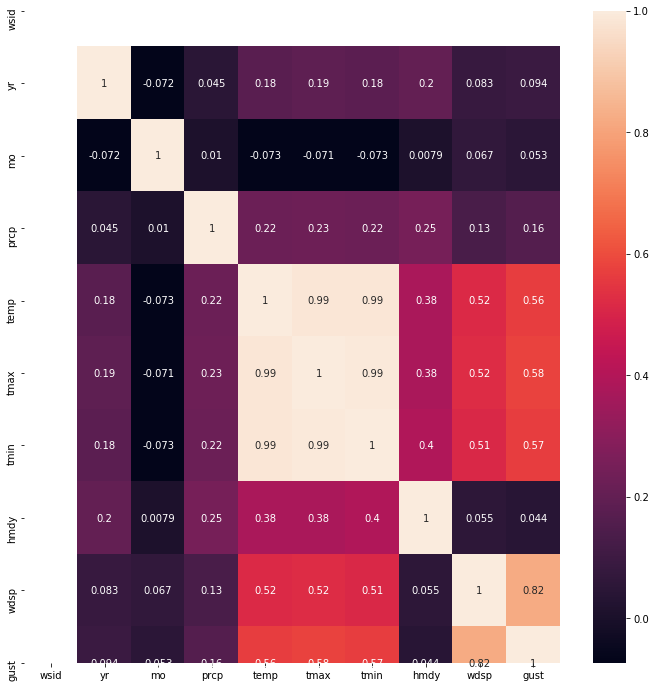

In [102]:
plt.figure(figsize=(12,12))
sns.color_palette("BuGn_r")

sns.heatmap(weatherstationdf.corr(), annot = True)

 We want to predict the Maximum Temperature dependent from the Minimum Temperature records. Therfore our "tmin" column will 
 be selected as our X variable and "tmax" will be choosen as our y variable. 

In [103]:
X = weatherstationdf['tmin'].values.reshape(-1,1)
y = weatherstationdf['tmax'].values.reshape(-1,1)

###### Splitting data for Training and Testing 

Next, we split 80% of the data as our training data and the other 20% of the data to be used as our test data set.
The test_size variable is the selected proportion in our case we will use 0.2 for 20%. 

In [104]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

#train and test data for the selected weather station
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_reg = LinearRegression()  
linear_reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Making prediction using our X_test containing tmin records for the selected staion id.

In [105]:
y_pred = linear_reg.predict(X_test)

###### Our finding show for the predicteddf after applying a random sample of 5 to the data set very close prediction values to those of our original given dataset. 

In [106]:
predicteddf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
predicteddf.sample(5)

,Actual,Predicted
2484,18.3,17.750191
1823,0.0,0.028595
918,25.1,24.146744
2836,16.3,16.806437
183,28.1,28.655789


#### Regression Analysis Visualization of our predictions
using a bar gaph we can pin our predictions and orignal values side by side and determine most if not all predicted values. Were close to actual accurate prediction of tmax records.

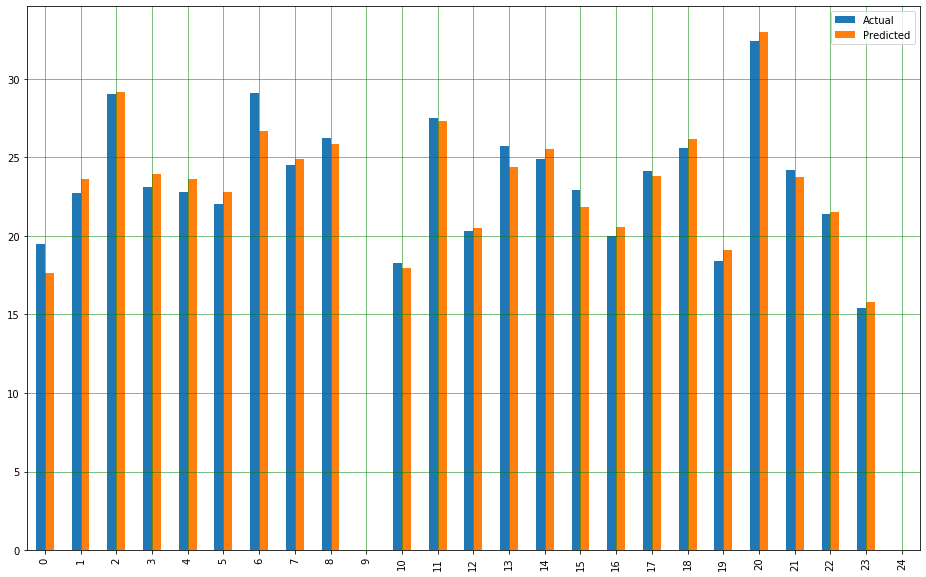

In [107]:
plotresult = predicteddf.head(25)
plotresult.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

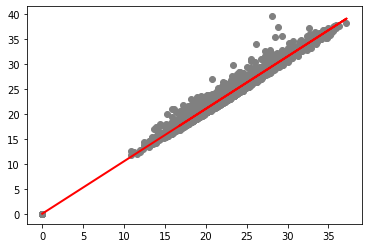

In [108]:
plt.scatter(X_test, y_test, color = 'grey')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Root mean squared error =  0.8546898274891934
R-squared =  0.9884211847560831


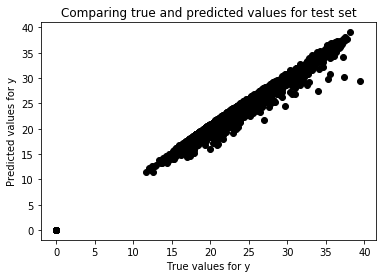

In [109]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-squared = ", metrics.r2_score(y_test, y_pred))

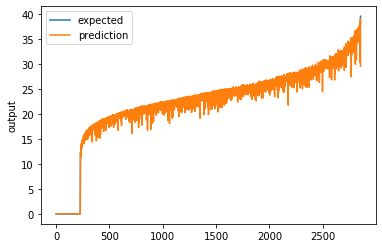

In [111]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
    #Regression lift Chart
chart_regression(y_pred.flatten(),y_test)

Regression algorithms and three evaluation metrics 

###### Mean Absolute Error (MAE) 

###### Mean Squared Error (MSE)

###### Root Mean Squared Error (RMSE)

In [112]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6008708017231362
Mean Squared Error: 0.7304947012135072
Root Mean Squared Error: 0.8546898274891934


## Continued Part A) Multiple Regression on weather dataset

Applying Multiple Linear Regression: Using the data in previous assignment

In [113]:
weatherstationdf.head(2)

,wsid,wsnm,date,yr,mo,prcp,temp,tmax,tmin,hmdy,wdsp,gust
5523969,371,ECOLOGIA AGRÍCOLA,2003-11-29,2003,11,5.600000,23.5,23.5,23.3,94.0,0.9,3.2
5500388,371,ECOLOGIA AGRÍCOLA,2001-03-21,2001,3,0.930511,27.4,27.4,25.8,71.0,2.6,5.0


###### Detemring our X and Y values for Multiple Regression

In [114]:
X_mr = weatherstationdf[['prcp', 'tmax', 'tmin', 'hmdy', 'wdsp','gust']].values
y_mr = weatherstationdf['temp'].values

Distibution plot graph to determing the average temperature intervals in our weather station data frame. This also demonstrated normalization in our data set.

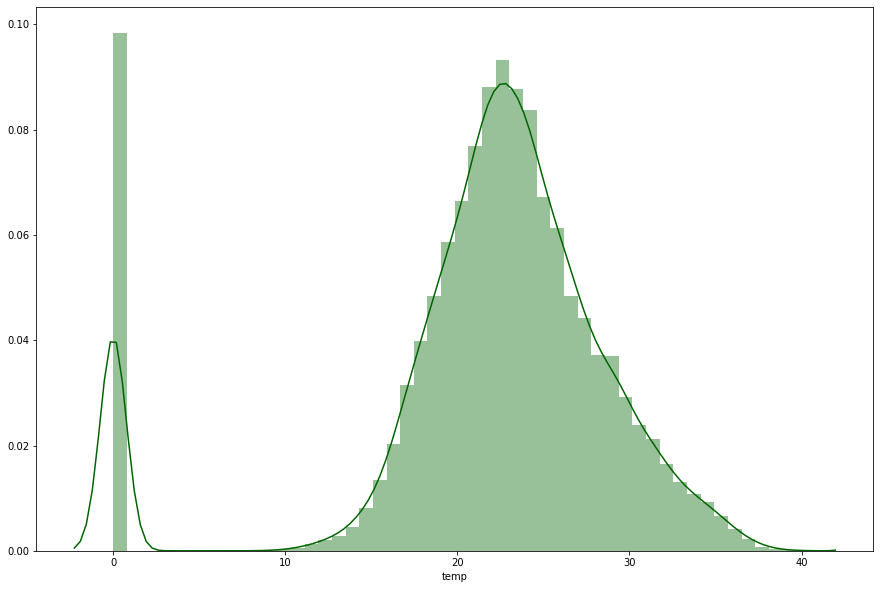

In [115]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(weatherstationdf['temp'], color = 'darkgreen')

### Splitting our data set in multi regression modeling 

Next, we split 80% of the data as our training data and the other 20% of the data to be used as our test data set.
The test_size variable is the selected proportion in our case we will use 0.2 for 20%. 

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_mr, y_mr, test_size=0.2, random_state=0)

###### Applying and Training our model for multiple regression

In [117]:
regression = LinearRegression()  
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
coeff_df = pd.DataFrame(regression.coef_, ['prcp', 'tmax', 'tmin', 'hmdy', 'wdsp','gust'], columns=['Coefficient'])
coeff_df


,Coefficient
prcp,-0.002827
tmax,0.410919
tmin,0.579694
hmdy,-0.001664
wdsp,0.082111
gust,-0.040959


###### Predicted values once applying regression modeling 

In [119]:
y_predict = regression.predict(X_test)

y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
y_df.head(10)

,Actual,Predicted
0,19.0,18.116454
1,22.5,22.792134
2,28.8,28.419249
3,22.8,22.941834
4,22.6,22.610014
5,21.7,21.937373
6,29.1,27.178866
7,24.5,24.094648
8,26.2,25.322181
9,0.0,0.436114


##### Regression Analysis : Visualization after applying mulit regression to our predicted findings

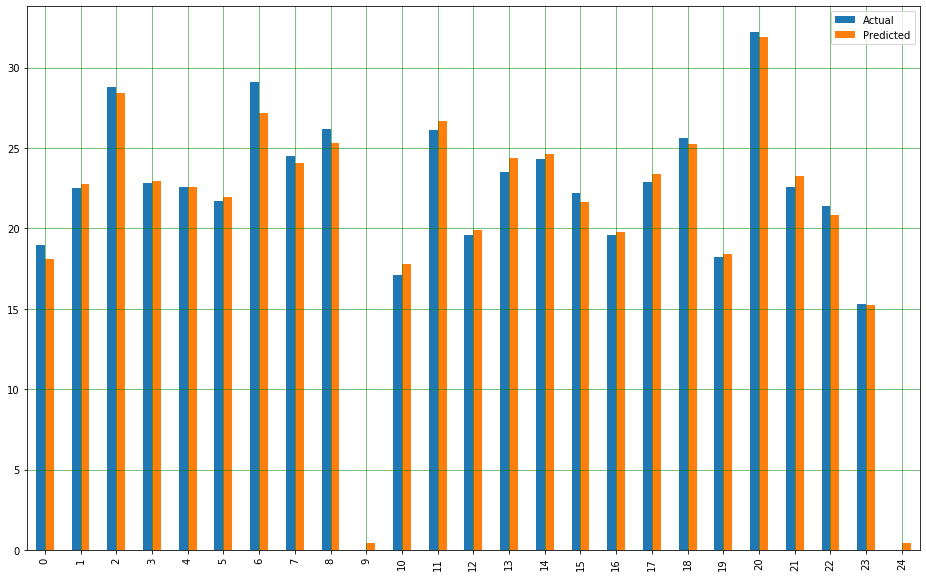

In [120]:
y_df = y_df.head(25)
y_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.5139944707668125
Mean Squared Error: 1.640419229734148
Root Mean Squared Error: 1.2807885187391976


Root mean squared error =  1.2807885187391976
R-squared =  0.9721228415677579


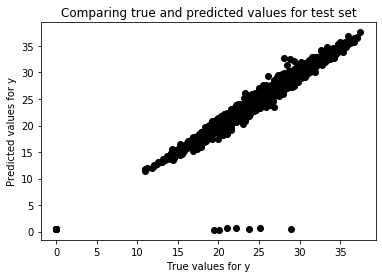

In [122]:
# Comparing true versus predicted values
plt.scatter(y_test, y_predict, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print("R-squared = ", metrics.r2_score(y_test, y_predict))

In [123]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


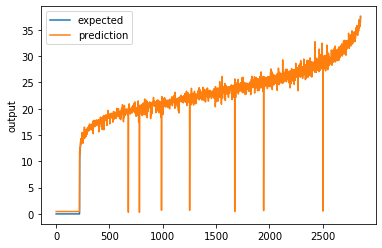

In [124]:
chart_regression(y_predict,y_test)